In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [12]:
df=pd.read_csv('Dataset_GMSalary_wnan.csv')

In [13]:
df.describe()

,Unnamed: 0,Id,FPYear,EDegree,GMSalary,GLArea,CMValue,CRate,PMotor,PHousehold,PHealth,PLife,PCompensations,childrennovo
count,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10267.000000,10277.000000,10286.000000,10169.000000,10288.000000,10134.000000,10126.000000,10292.000000
mean,5145.500000,5148.398562,1991.048776,1.479693,4995.917343,2.709483,217.360619,0.679853,296.017130,194.831975,167.208976,38.292206,37.399691,0.707151
std,2971.188819,2972.300636,510.621709,0.795158,1968.863807,1.266284,255.718810,0.319091,138.940014,208.631613,74.885772,40.227701,39.207817,0.455092
min,0.000000,1.000000,1974.000000,0.000000,665.000000,1.000000,-490.200000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,0.000000
25%,2572.750000,2574.750000,1980.000000,1.000000,3409.750000,1.000000,-9.220000,0.392249,189.757500,48.900000,110.910000,9.780000,9.890000,0.000000
50%,5145.500000,5147.500000,1986.000000,2.000000,5002.000000,3.000000,187.040000,0.719169,298.335000,131.700000,162.030000,24.560000,24.670000,1.000000
75%,7718.250000,7722.250000,1992.000000,2.000000,6580.000000,4.000000,399.080000,0.976113,407.410000,281.150000,218.930000,54.900000,53.230000,1.000000
max,10291.000000,10296.000000,53784.000000,3.000000,10042.000000,4.000000,1571.760000,1.620145,585.220000,1011.850000,442.860000,198.260000,192.370000,1.000000


Drop das linhas com mais que 1 NA

In [14]:
df.isnull().sum()


Unnamed: 0          0
Id                  0
FPYear              0
EDegree             0
GMSalary            0
GLArea              0
CMValue            25
CRate              15
PMotor              6
PHousehold        123
PHealth             4
PLife             158
PCompensations    166
childrennovo        0
dtype: int64

In [21]:
df_out=df.iloc[df[(df.isnull().sum(axis=1) >= 1)].index]

In [22]:
df_out.describe()

,Unnamed: 0,Id,FPYear,EDegree,GMSalary,GLArea,CMValue,CRate,PMotor,PHousehold,PHealth,PLife,PCompensations,childrennovo
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,418.000000,428.000000,437.000000,320.000000,439.000000,285.000000,277.000000,443.000000
mean,5159.927765,5192.013544,1986.227991,0.489842,2899.841986,2.722348,308.575718,0.700129,79.834805,372.167344,126.151822,68.787544,66.411155,0.654628
std,3028.264370,3045.169592,6.801978,0.667107,1857.916891,1.268170,459.423290,0.375699,77.684140,276.624772,56.288437,53.393528,53.417542,0.476027
min,13.000000,14.000000,1974.000000,0.000000,670.000000,1.000000,-490.200000,0.000000,-4.110000,-45.000000,0.000000,-6.000000,-11.000000,0.000000
25%,2610.000000,2628.000000,1980.000000,0.000000,1732.000000,1.000000,-25.000000,0.348778,37.120000,142.662500,85.850000,22.670000,20.780000,0.000000
50%,5182.000000,5216.000000,1987.000000,0.000000,2317.000000,3.000000,184.095000,0.744916,59.900000,309.775000,119.910000,58.790000,53.230000,1.000000
75%,7921.500000,7970.000000,1992.000000,1.000000,3148.000000,4.000000,534.745000,1.000000,96.350000,585.800000,156.530000,110.020000,104.240000,1.000000
max,10235.000000,10293.000000,1998.000000,3.000000,9131.000000,4.000000,1571.760000,1.550872,557.440000,1006.300000,398.410000,195.260000,188.480000,1.000000


In [6]:
X=df.iloc[:,:].values
data = np.asarray(df['EDegree'])
data=data.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data)
data = imputer.transform(data)

In [7]:
df['EDegree'] = data
df.dty

In [8]:
df.isnull().sum()

Id                 0
FPYear            29
EDegree            0
GMSalary           0
GLArea             0
HChildren         20
CMValue            0
CRate              0
PMotor             0
PHousehold         0
PHealth            0
PLife              0
PCompensations     0
dtype: int64

In [9]:
df_2.describe()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,9814.000000,9802.000000,9816.000000,9789.000000,9816.000000,9803.000000,9816.00000,9816.000000,9799.000000,9816.000000,9792.000000,9729.000000,9747.000000
mean,1986.011107,48.732708,1.521292,5084.589539,2.712103,0.709579,213.96233,0.679945,306.207419,190.006571,169.696171,38.072181,37.025859
std,6.601417,16.907443,0.772130,1923.767792,1.265974,0.453980,242.74101,0.315473,132.361594,203.824279,74.404912,39.947002,38.632318
min,1974.000000,15.000000,0.000000,665.000000,1.000000,0.000000,-365.84000,0.000000,1.780000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,34.000000,1.000000,3555.000000,1.000000,0.000000,-8.13500,0.394557,205.260000,48.350000,113.020000,9.890000,9.890000
50%,1986.000000,49.000000,2.000000,5091.000000,3.000000,1.000000,187.59000,0.719071,308.390000,128.350000,164.920000,24.560000,24.670000
75%,1992.000000,63.000000,2.000000,6621.000000,4.000000,1.000000,396.99750,0.975240,412.190000,274.500000,220.930000,54.010000,52.900000
max,1998.000000,81.000000,3.000000,10042.000000,4.000000,1.000000,1254.24000,1.620145,585.220000,1011.850000,442.860000,201.370000,194.590000


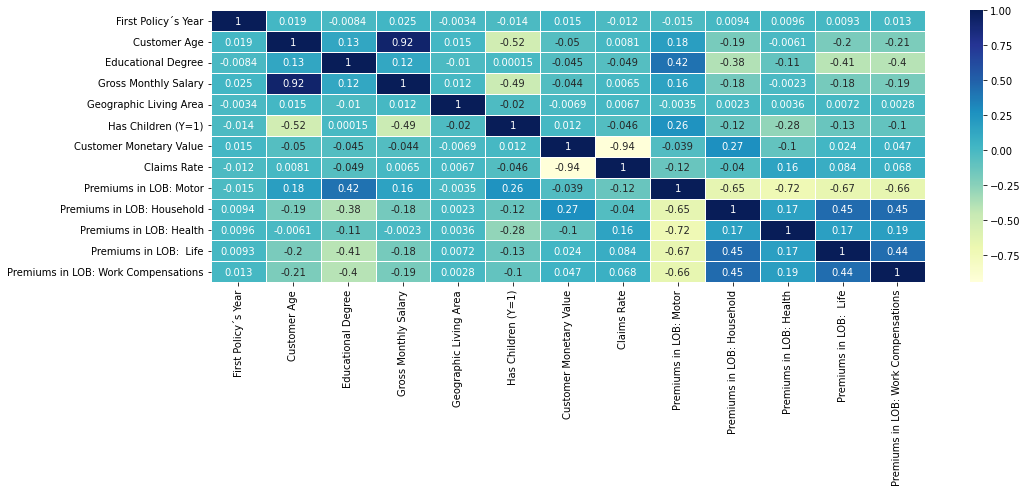

In [35]:
plt.figure(figsize = (16,5))
sns.heatmap(df_2.corr('pearson'),cmap="YlGnBu", annot=True,linewidths=.5)
plt.show()

Drop das colunas com +0.9 de corr

In [11]:
df_3=df_2.drop(['Customer Age','Customer Monetary Value'],axis=1)

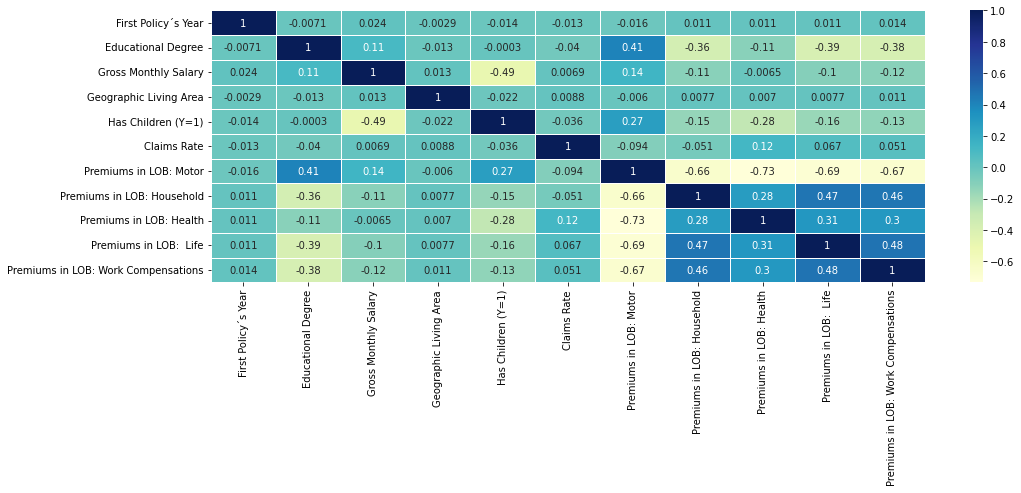

In [16]:
plt.figure(figsize = (16,5))
sns.heatmap(df_3.corr('spearman'),cmap="YlGnBu", annot=True,linewidths=.5)
plt.show()

Scale nas features continuas

In [19]:
X= df_3.iloc[:,[0,2,6,7,8,9,10]].values


array([[1.9850e+03, 4.3540e+03, 3.7585e+02, ..., 1.4636e+02, 4.7010e+01,
        1.6890e+01],
       [1.9810e+03, 1.3530e+03, 7.7460e+01, ..., 1.1669e+02, 1.9448e+02,
        1.0613e+02],
       [1.9910e+03, 4.5540e+03, 2.0615e+02, ..., 1.2458e+02, 8.6350e+01,
        9.9020e+01],
       ...,
       [1.9940e+03, 5.8350e+03, 4.0363e+02, ..., 1.4225e+02, 1.2670e+01,
        4.8900e+00],
       [1.9810e+03, 3.9410e+03, 1.8859e+02, ..., 1.9837e+02, 6.3900e+01,
        1.1291e+02],
       [1.9900e+03, 5.6300e+03, 4.1408e+02, ..., 1.4125e+02, 6.8900e+00,
        1.2890e+01]])

In [20]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [25]:
df_4=df_3.copy()
df_4['First Policy´s Year']=X[:,0]
df_4['Gross Monthly Salary']=X[:,1]
df_4['Premiums in LOB: Motor']=X[:,2]
df_4['Premiums in LOB: Household']=X[:,3]
df_4['Premiums in LOB: Health']=X[:,4]
df_4['Premiums in LOB:  Life']=X[:,5]
df_4['Premiums in LOB: Work Compensations']=X[:,6]

In [28]:
df_4.head()

,First Policy´s Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,0.458333,1.0,0.393409,1.0,1.0,0.390032,0.641146,0.142108,0.333663,0.259202,0.139842
1,0.291667,1.0,0.073371,4.0,1.0,1.116503,0.129713,0.451948,0.266984,0.966934,0.571809
2,0.708333,0.0,0.414738,3.0,0.0,0.284810,0.350285,0.275567,0.284716,0.448001,0.537393
3,0.666667,2.0,0.163378,4.0,1.0,0.986665,0.309715,0.108893,0.704047,0.203196,0.195266
4,0.500000,2.0,0.305108,4.0,1.0,0.904281,0.577334,0.112987,0.415084,0.123722,0.258725


Fill null values 
Possivelmente Decision Trees ou KNN